<a href="https://colab.research.google.com/github/andhiratobing/RockPaperScissors-Classification-Image/blob/main/Andhi_Ratobing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip\
  -O /rockpaperscissors.zip

--2020-10-28 13:00:01--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/rockpaperscissors.zip’

/rockpaperscissors. 100%[===================>] 307.92M  8.83MB/s    in 1m 49s  

2020-10-28 13:01:51 (2.83 MB/s) - ‘/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
 
#memisah direktori training dn validasi 
base_dir = '/tmp/rockpaperscissorss/splitfolders'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
# melihat sub direktori pada dataset 
os.listdir('/tmp/rockpaperscissors/rps-cv-images')

['scissors', 'rock', 'paper', 'README_rpc-cv-images.txt']

In [ ]:
import splitfolders
!pip install split-folders
splitfolders.ratio('/tmp/rockpaperscissors/rps-cv-images', 
                   output='/tmp/rockpaperscissorss/splitfolders', 
                   seed=2188, 
                   ratio=(0.6, 0.4))

Copying files: 2188 files [00:00, 3951.65 files/s]


In [ ]:
#membuat diretori training dan validation berdasrkan nama folder dataset
train_scissors = os.path.join(train_dir, 'scissors')
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')

validation_scissors = os.path.join(validation_dir ,'scissors')
validation_rock = os.path.join(validation_dir, 'rock')
validation_paper = os.path.join(validation_dir, 'paper')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Augmentasi Data
train_datagen = ImageDataGenerator(
                    rescale=1./255, #Rescaling data menjadi 1/255
                    rotation_range=20, #rotation_range 20
                    horizontal_flip=True, #Horizontal flip true
                    shear_range = 0.2, #Shearing image skala 0.2
                    zoom_range=0.2, #Zooming image dengan range 0.2
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,  #Rescaling data menjadi 1/255
                    rotation_range=20,  #rotation_range 20
                    horizontal_flip=True,  #Horizontal flip true
                    shear_range = 0.2,  #Shearing image skala 0.2
                    zoom_range=0.2,  #Zooming image dengan range 0.2
                    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=25,
        # karena merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'
        class_mode= 'categorical')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=25, # karena merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization,Conv2D,MaxPooling2D
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

In [ ]:
# compile model dengan 'adam' optimizer loss function 'categorical_crossentropy'
from keras.optimizers import Adam

model.compile(optimizer= 'adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath = 'model.h5', verbose = 2, save_best_only = True)
# melatih model dengan model.fit 
model.fit(
      train_generator,
      steps_per_epoch=25,  # batch yang akan dieksekusi pada setiap epoch
      epochs=20, # menambahkan eposchs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # batch yang akan dieksekusi pada setiap epoch
      callbacks = [checkpointer],
      verbose=2)



Epoch 1/20

Epoch 00001: val_loss improved from inf to 0.05910, saving model to model.h5
25/25 - 30s - loss: 0.1178 - accuracy: 0.9568 - val_loss: 0.0591 - val_accuracy: 0.9760
Epoch 2/20

Epoch 00002: val_loss did not improve from 0.05910
25/25 - 29s - loss: 0.1271 - accuracy: 0.9624 - val_loss: 0.0984 - val_accuracy: 0.9680
Epoch 3/20

Epoch 00003: val_loss improved from 0.05910 to 0.03699, saving model to model.h5
25/25 - 30s - loss: 0.0707 - accuracy: 0.9728 - val_loss: 0.0370 - val_accuracy: 0.9920
Epoch 4/20

Epoch 00004: val_loss improved from 0.03699 to 0.02624, saving model to model.h5
25/25 - 29s - loss: 0.0801 - accuracy: 0.9641 - val_loss: 0.0262 - val_accuracy: 0.9920
Epoch 5/20

Epoch 00005: val_loss did not improve from 0.02624
25/25 - 30s - loss: 0.1180 - accuracy: 0.9771 - val_loss: 0.0904 - val_accuracy: 0.9760
Epoch 6/20

Epoch 00006: val_loss did not improve from 0.02624
25/25 - 30s - loss: 0.0419 - accuracy: 0.9872 - val_loss: 0.0290 - val_accuracy: 0.9920
Epoch 7/

Saving IRSnSZdAUmx8ZVkD.png to IRSnSZdAUmx8ZVkD.png
IRSnSZdAUmx8ZVkD.png
rock


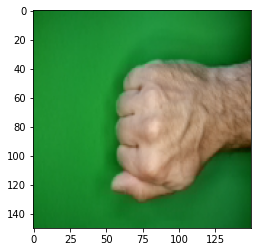

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # prediksi image
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')